In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data
import yfinance as yf


In [2]:
start = "2010-01-01"
end = "2021-12-31"

df = yf.download('TSLA', start, end)
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500
...,...,...,...,...,...,...
2021-12-23,335.600006,357.660004,332.519989,355.666656,355.666656,92713200
2021-12-27,357.890015,372.333344,356.906677,364.646667,364.646667,71145900
2021-12-28,369.829987,373.000000,359.473328,362.823334,362.823334,60324000


In [3]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-12-23,335.600006,357.660004,332.519989,355.666656,355.666656,92713200
2021-12-27,357.890015,372.333344,356.906677,364.646667,364.646667,71145900
2021-12-28,369.829987,373.000000,359.473328,362.823334,362.823334,60324000
2021-12-29,366.213318,368.000000,354.713318,362.063324,362.063324,56154000
2021-12-30,353.776672,365.183319,351.049988,356.779999,356.779999,47040900


In [4]:
df = df.reset_index()
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
1,2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2,2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
3,2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
4,2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500


In [5]:
df = df.drop(['Date', 'Adj Close'], axis = 1)
df.head()

,Open,High,Low,Close,Volume
0,1.266667,1.666667,1.169333,1.592667,281494500
1,1.719333,2.028000,1.553333,1.588667,257806500
2,1.666667,1.728000,1.351333,1.464000,123282000
3,1.533333,1.540000,1.247333,1.280000,77097000
4,1.333333,1.333333,1.055333,1.074000,103003500


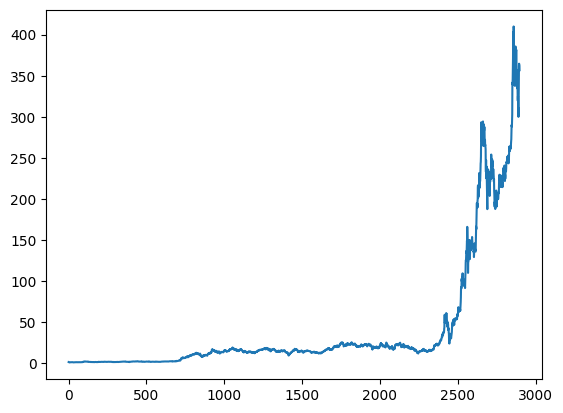

In [6]:
plt.plot(df['Close'])

In [7]:
ma100 = df['Close'].rolling(100).mean()
ma100

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
2893    296.426800
2894    297.703534
2895    298.949667
2896    300.239967
2897    301.428567
Name: Close, Length: 2898, dtype: float64

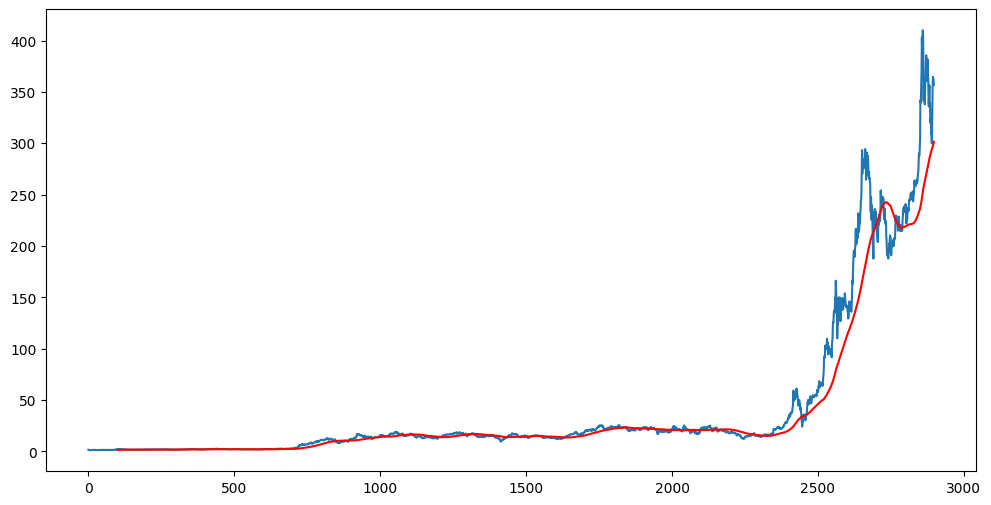

In [8]:
plt.figure(figsize = (12, 6))
plt.plot(df['Close'])
plt.plot(ma100, 'red')

In [9]:
df.shape

(2898, 5)

In [10]:
# Split data into train and test
train = pd.DataFrame(df['Close'][0:int(len(df)*0.7)])
test = pd.DataFrame(df['Close'][int(len(df)*0.7):int(len(df))])

train.shape, test.shape

((2028, 1), (870, 1))

In [11]:
train.head(), test.head()

(      Close
 0  1.592667
 1  1.588667
 2  1.464000
 3  1.280000
 4  1.074000,
           Close
 2028  21.348667
 2029  20.905333
 2030  20.213333
 2031  19.828667
 2032  20.582666)

In [12]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range = (0, 1))

In [13]:
train_arr = scaler.fit_transform(train)
train_arr

array([[0.02191227],
       [0.02174975],
       [0.01668473],
       ...,
       [0.79712884],
       [0.83122965],
       [0.83437158]])

In [14]:
X_train = []
y_train = []

for i in range(100, train_arr.shape[0]):
  X_train.append(train_arr[i-100:i])
  y_train.append(train_arr[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)

In [15]:
X_train.shape, X_train

((1928, 100, 1),
 array([[[2.19122659e-02],
         [2.17497545e-02],
         [1.66847339e-02],
         ...,
         [4.06283831e-02],
         [3.75677252e-02],
         [3.70801812e-02]],
 
        [[2.17497545e-02],
         [1.66847339e-02],
         [9.20911077e-03],
         ...,
         [3.75677252e-02],
         [3.70801812e-02],
         [3.81636182e-02]],
 
        [[1.66847339e-02],
         [9.20911077e-03],
         [8.39665043e-04],
         ...,
         [3.70801812e-02],
         [3.81636182e-02],
         [4.11430204e-02]],
 
        ...,
 
        [[8.59967427e-01],
         [8.94826571e-01],
         [9.10752906e-01],
         ...,
         [8.21126718e-01],
         [8.15032476e-01],
         [8.20882926e-01]],
 
        [[8.94826571e-01],
         [9.10752906e-01],
         [9.25297859e-01],
         ...,
         [8.15032476e-01],
         [8.20882926e-01],
         [7.97128843e-01]],
 
        [[9.10752906e-01],
         [9.25297859e-01],
         [9.0788180

In [16]:
y_train

array([0.03816362, 0.04114302, 0.04767066, ..., 0.79712884, 0.83122965,
       0.83437158])

# ML Model

In [17]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [24]:
model = Sequential()
model.add(LSTM(units = 64,
               activation = 'relu',
               return_sequences = True,
               input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 64,
               activation = 'relu',
               return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units = 218,
               activation = 'relu'))
model.add(Dropout(0.3))

model.add(Dense(units = 1))

In [25]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_9 (LSTM)               (None, 100, 64)           16896     
                                                                 
 dropout_9 (Dropout)         (None, 100, 64)           0         
                                                                 
 lstm_10 (LSTM)              (None, 100, 64)           33024     
                                                                 
 dropout_10 (Dropout)        (None, 100, 64)           0         
                                                                 
 lstm_11 (LSTM)              (None, 218)               246776    
                                                                 
 dropout_11 (Dropout)        (None, 218)               0         
                                                                 
 dense_3 (Dense)             (None, 1)                

In [26]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(X_train, y_train,
          epochs = 50,
          verbose = True)

Epoch 1/50
61/61 [==============================] - 35s 471ms/step - loss: 0.0282
Epoch 2/50
61/61 [==============================] - 28s 458ms/step - loss: 0.0042
Epoch 3/50
61/61 [==============================] - 32s 520ms/step - loss: 0.0042
Epoch 4/50
61/61 [==============================] - 28s 456ms/step - loss: 0.0037
Epoch 5/50
61/61 [==============================] - 28s 460ms/step - loss: 0.0041
Epoch 6/50
61/61 [==============================] - 28s 460ms/step - loss: 0.0032
Epoch 7/50
61/61 [==============================] - 29s 471ms/step - loss: 0.0034
Epoch 8/50
61/61 [==============================] - 28s 459ms/step - loss: 0.0033
Epoch 9/50
61/61 [==============================] - 28s 453ms/step - loss: 0.0031
Epoch 10/50
61/61 [==============================] - 27s 440ms/step - loss: 0.0032
Epoch 11/50
61/61 [==============================] - 29s 464ms/step - loss: 0.0032
Epoch 12/50
61/61 [==============================] - 28s 466ms/step - loss: 0.0034
Epoch 13/50
6

In [27]:
model.save("/content/drive/MyDrive/Colab Notebooks/lstm_model.h5")

In [28]:
test.head()

,Close
2028,21.348667
2029,20.905333
2030,20.213333
2031,19.828667
2032,20.582666


In [29]:
train.tail(100)

,Close
1928,23.827999
1929,23.399332
1930,22.870667
1931,22.062000
1932,22.341333
...,...
2023,21.114000
2024,21.257999
2025,20.673332
2026,21.512667


In [30]:
past_100_days = train.tail(100)

In [31]:
final_df = pd.concat([past_100_days, test], ignore_index = True)
final_df.head()

<ipython-input-31-5db5abb51cc3>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = past_100_days.append(test, ignore_index = True)


,Close
0,23.827999
1,23.399332
2,22.870667
3,22.062000
4,22.341333


In [32]:
input_data = scaler.fit_transform(final_df)

In [34]:
input_data

array([[0.02988822],
       [0.02881127],
       [0.02748309],
       [0.02545147],
       [0.02615324],
       [0.02585679],
       [0.02499422],
       [0.02568092],
       [0.02514496],
       [0.02482171],
       [0.02789344],
       [0.02727876],
       [0.02473127],
       [0.02455876],
       [0.02384693],
       [0.0225422 ],
       [0.02203806],
       [0.02303964],
       [0.0217952 ],
       [0.020529  ],
       [0.02097117],
       [0.01678396],
       [0.01319972],
       [0.01459825],
       [0.01231204],
       [0.01483273],
       [0.01808367],
       [0.02122909],
       [0.02015382],
       [0.01853924],
       [0.02105826],
       [0.02042683],
       [0.01927954],
       [0.02032801],
       [0.01879884],
       [0.01820929],
       [0.01915727],
       [0.02028446],
       [0.01863638],
       [0.01748574],
       [0.01750081],
       [0.01703687],
       [0.01783914],
       [0.01927954],
       [0.01924939],
       [0.02025767],
       [0.02046368],
       [0.017

In [35]:
input_data.shape

(970, 1)

In [37]:
X_test = []
y_test = []

for i in range(100, input_data.shape[0]):
  X_test.append(input_data[i-100:i])
  y_test.append(input_data[i, 0])

In [38]:
X_test, y_test = np.array(X_test), np.array(y_test)

In [39]:
X_test.shape, y_test.shape

((870, 100, 1), (870,))

In [42]:
# Making predictions
y_preds = model.predict(X_test)

28/28 [==============================] - 6s 206ms/step


In [43]:
y_preds.shape

(870, 1)

In [44]:
y_test

array([0.02365935, 0.02254555, 0.02080703, 0.01984062, 0.02173491,
       0.02138486, 0.01979875, 0.01862466, 0.01995954, 0.02041175,
       0.02856842, 0.02833895, 0.02730388, 0.03359808, 0.03205216,
       0.02905581, 0.02956497, 0.02971906, 0.02825019, 0.02675117,
       0.02620851, 0.02119225, 0.02168467, 0.02393905, 0.0238955 ,
       0.02363757, 0.02409314, 0.02349855, 0.02225747, 0.02111018,
       0.02079865, 0.02054909, 0.01842032, 0.01704525, 0.01708042,
       0.01411421, 0.01784249, 0.01682751, 0.01868663, 0.01850574,
       0.01946712, 0.01940683, 0.01775205, 0.02010693, 0.01999136,
       0.02012033, 0.02021747, 0.02043688, 0.0218756 , 0.02153057,
       0.01437046, 0.02206318, 0.0204419 , 0.01940013, 0.01722781,
       0.01389815, 0.01199046, 0.01404051, 0.01304899, 0.01227016,
       0.01336721, 0.01350288, 0.01635017, 0.01554456, 0.01422643,
       0.01357154, 0.01373066, 0.01928958, 0.01834495, 0.02275994,
       0.02544644, 0.02610802, 0.02527895, 0.02652172, 0.02768

In [45]:
y_preds

array([[0.03440966],
       [0.03422616],
       [0.03406549],
       [0.03391252],
       [0.03375277],
       [0.03359047],
       [0.03342773],
       [0.03325805],
       [0.03307267],
       [0.03287715],
       [0.0326802 ],
       [0.03253782],
       [0.03247923],
       [0.03250954],
       [0.03266096],
       [0.03293122],
       [0.03328814],
       [0.03370383],
       [0.03415291],
       [0.03460421],
       [0.03502591],
       [0.03539456],
       [0.03566793],
       [0.03582963],
       [0.0358917 ],
       [0.03587001],
       [0.03578097],
       [0.03564438],
       [0.03547426],
       [0.03527622],
       [0.03505087],
       [0.03480084],
       [0.03453031],
       [0.03423318],
       [0.03390402],
       [0.03354639],
       [0.03315601],
       [0.03275187],
       [0.0323454 ],
       [0.03195559],
       [0.03159502],
       [0.03127622],
       [0.03100559],
       [0.03077719],
       [0.03059791],
       [0.03046889],
       [0.03038821],
       [0.030

In [46]:
scaler.scale_

array([0.00251232])

In [47]:
scale_factor = 1/0.00251232
y_preds = y_preds*scale_factor
y_test = y_test*scale_factor

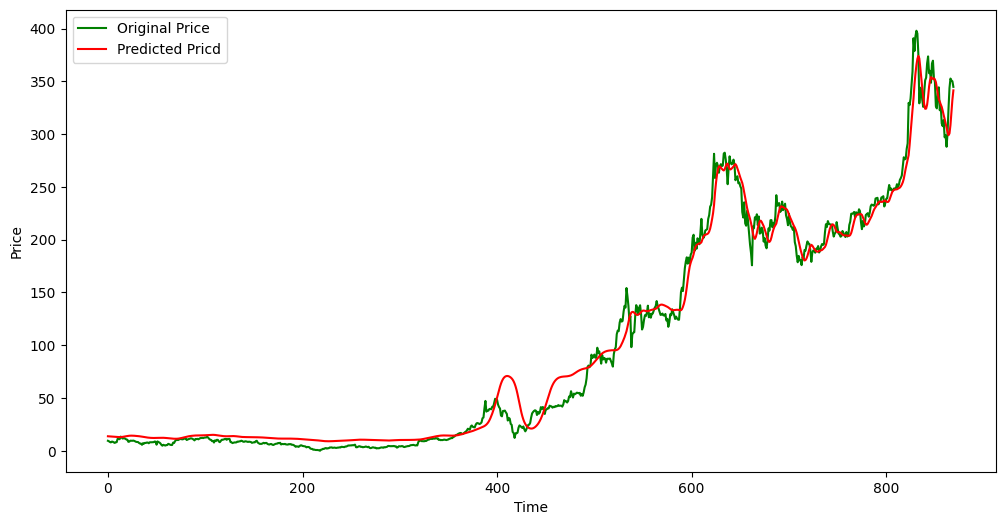

In [49]:
plt.figure(figsize = (12, 6))
plt.plot(y_test, 'green', label = 'Original Price')
plt.plot(y_preds, 'red', label = "Predicted Price")
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()